In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covidDF = pd.read_csv("covid.csv")
breastDF = pd.read_csv("breast.csv")
#Type of intervention, Eligibility, Results presented

covidDF['Conditions'] = "Covid"
breastDF['Conditions'] = "Breast Cancer"
#Combine the two datasets
combinedDF = pd.concat([covidDF, breastDF])
combinedDF


,NCT Number,Status,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Start Date,Completion Date
0,NCT04446377,COMPLETED,Covid,DRUG: Apilimod Dimesylate Capsule|OTHER: Placebo,OrphAI Therapeutics,Yale University,ALL,"ADULT, OLDER_ADULT",PHASE2,142,INDUSTRY,INTERVENTIONAL,7/15/2020,4/19/2021
1,NCT05508477,RECRUITING,Covid,BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-2...,Dr. Soetomo General Hospital,Indonesia-MoH|Universitas Airlangga|Biotis Pha...,ALL,"ADULT, OLDER_ADULT",PHASE3,4005,OTHER_GOV,INTERVENTIONAL,6/28/2022,5/28/2023
2,NCT04472494,TERMINATED,Covid,BIOLOGICAL: Abatacept|OTHER: Placebo,Bristol-Myers Squibb,NaN,ALL,"ADULT, OLDER_ADULT",PHASE2,61,INDUSTRY,INTERVENTIONAL,10/14/2020,9/13/2021
3,NCT04720794,COMPLETED,Covid,DEVICE: Lucira COVID-19 All-In-One test kit,Lucira Health Inc,NaN,ALL,"ADULT, OLDER_ADULT",NaN,101,INDUSTRY,INTERVENTIONAL,9/25/2020,10/20/2020
4,NCT04598594,COMPLETED,Covid,"DRUG: Patch, Nicotine|DRUG: Patch, Placebo",Assistance Publique - Hôpitaux de Paris,NaN,ALL,"ADULT, OLDER_ADULT",PHASE3,220,OTHER,INTERVENTIONAL,11/6/2020,6/20/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,NCT03990896,RECRUITING,Breast Cancer,DRUG: Talazoparib,Massachusetts General Hospital,Pfizer,FEMALE,"ADULT, OLDER_ADULT",PHASE2,30,OTHER,INTERVENTIONAL,11/18/2021,7/31/2024
2991,NCT05259696,RECRUITING,Breast Cancer,BIOLOGICAL: E-602|BIOLOGICAL: Cemiplimab,"Palleon Pharmaceuticals, Inc.",NaN,ALL,"ADULT, OLDER_ADULT",PHASE1|PHASE2,273,INDUSTRY,INTERVENTIONAL,2/11/2022,2025-06
2992,NCT05587296,ACTIVE_NOT_RECRUITING,Breast Cancer,DRUG: Elinzanetant (BAY3427080)|DRUG: Placebo,Bayer,NaN,FEMALE,"ADULT, OLDER_ADULT",PHASE3,405,INDUSTRY,INTERVENTIONAL,10/14/2022,12/4/2026
2993,NCT04867096,RECRUITING,Breast Cancer,OTHER: Physical activity,Centre Hospitalier Universitaire de Besancon,NaN,FEMALE,"ADULT, OLDER_ADULT",NaN,60,OTHER,INTERVENTIONAL,4/8/2021,2023-08


In [91]:
#Load the ctg-studies.csv
ctgDF = pd.read_csv("ctg-studies.csv")
ctgDF
#Load ctg-studies(1).csv
ctgDF1 = pd.read_csv("ctg-studies (1).csv")
ctgDF1

,NCT Number,Study Results,Primary Completion Date,Results First Posted
0,NCT04591431,NO,2024-12,NaN
1,NCT05244382,NO,2024-06,NaN
2,NCT05025020,NO,2024-08,NaN
3,NCT06080620,NO,2025-10-01,NaN
4,NCT05464082,NO,2025-09-30,NaN
...,...,...,...,...
2876,NCT05277051,NO,2026-10-14,NaN
2877,NCT06162351,NO,2025-07-15,NaN
2878,NCT05228951,NO,2022-12-31,NaN
2879,NCT05403554,NO,2025-06-30,NaN


In [92]:
#Join ctgDF with combinedDF on the NCT Number column
joinedDFCovid = pd.merge(ctgDF, combinedDF, on="NCT Number")
joinedDFBreast = pd.merge(ctgDF1, combinedDF, on="NCT Number")


In [93]:
#Let's see the proportions of studies that post results ["Study Results"] loaded into a dataframe for both covid and breast cancer
covidPropDF = joinedDFCovid["Study Results"].value_counts(normalize=True).reset_index()
covidPropDF



,index,Study Results
0,NO,0.887409
1,YES,0.112591


In [94]:
#Does breast cancer have more studies with results than covid?
breastPropDF = joinedDFBreast["Study Results"].value_counts(normalize=True).reset_index()
breastPropDF

,index,Study Results
0,NO,0.982861
1,YES,0.017139


In [95]:
#Combine these two dataframes and graph them on two side by side pie charts
combinedPropDF = pd.concat([covidPropDF, breastPropDF], axis=1)
combinedPropDF.columns = ["Covid Results", "Covid Proportion", "Breast Cancer Results", "Breast Cancer Proportion"]
combinedPropDF


,Covid Results,Covid Proportion,Breast Cancer Results,Breast Cancer Proportion
0,NO,0.887409,NO,0.982861
1,YES,0.112591,YES,0.017139


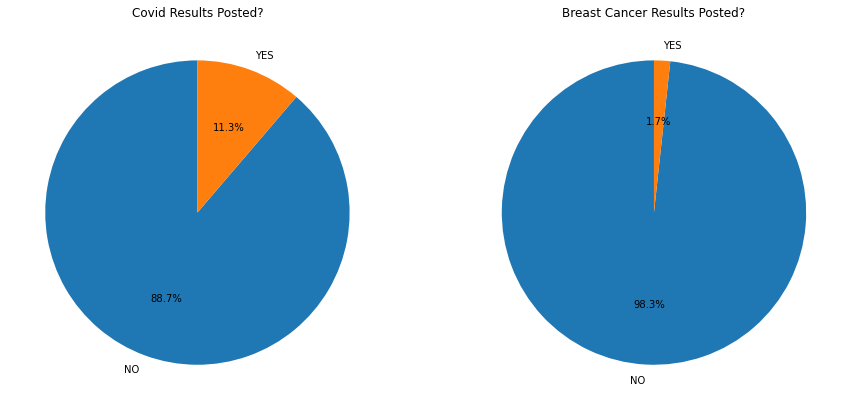

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), facecolor='white')
ax[0].pie(combinedPropDF["Covid Proportion"], labels=combinedPropDF["Covid Results"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Covid Results Posted?")
ax[1].pie(combinedPropDF["Breast Cancer Proportion"], labels=combinedPropDF["Breast Cancer Results"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Breast Cancer Results Posted?")
plt.show()


In [97]:
#Now I would like to examine combinedDF in order to determine which are the 5 most commmon sponsors of studies, but I'd like a unique list for each condition
covidSponsors = combinedDF[combinedDF["Conditions"] == "Covid"]["Sponsor"].value_counts().reset_index()
covidSponsors.columns = ["Sponsor", "Count"]
covidSponsors.head(10)




,Sponsor,Count
0,Assistance Publique - Hôpitaux de Paris,57
1,National Institute of Allergy and Infectious D...,28
2,Pfizer,28
3,BioNTech SE,21
4,Sinocelltech Ltd.,20
5,"Anhui Zhifei Longcom Biologic Pharmacy Co., Ltd.",19
6,"ModernaTX, Inc.",18
7,Cairo University,15
8,Gamaleya Research Institute of Epidemiology an...,15
9,Novavax,14


In [98]:
#Let's get that for breast cancer
breastSponsors = combinedDF[combinedDF["Conditions"] == "Breast Cancer"]["Sponsor"].value_counts().reset_index()
breastSponsors.columns = ["Sponsor", "Count"]
breastSponsors.head(10)

,Sponsor,Count
0,Fudan University,73
1,AstraZeneca,39
2,Memorial Sloan Kettering Cancer Center,38
3,M.D. Anderson Cancer Center,37
4,Dana-Farber Cancer Institute,32
5,National Cancer Institute (NCI),31
6,Sun Yat-Sen Memorial Hospital of Sun Yat-Sen U...,30
7,Mayo Clinic,27
8,Henan Cancer Hospital,21
9,The First Affiliated Hospital with Nanjing Med...,21


In [99]:
#For the 5 most common sponsors of studies for covid, I would like to calculate the proprotion of studies that they sponsor for which they post results
covidTopSponsors = list(covidSponsors['Sponsor'].head(5))
covidTopSponsors
#I want to find the total numbers of studies that each of these have sponsored, and the number of those studies for which results have been posted. From their I can calculate the proportion of studies for which results have been posted. Use the joinedDFCovid dataframe
covidTopSponsorsDF = joinedDFCovid[joinedDFCovid["Sponsor"].isin(covidTopSponsors)]
#I want to group by sponsor and then count the number of studies for which results have been posted
covidTopSponsorsResults = covidTopSponsorsDF.groupby("Sponsor")["Study Results"].value_counts().unstack().reset_index()
covidTopSponsorsResults.columns = ["Sponsor", "No Results", "Results"]
covidTopSponsorsResults
##Rename Assistance Publique - Hôpitaux de Paris to Hôpitaux de Paris
covidTopSponsorsResults["Sponsor"] = covidTopSponsorsResults["Sponsor"].replace("Assistance Publique - Hôpitaux de Paris", "Hôpitaux de Paris")
covidTopSponsorsResults

,Sponsor,No Results,Results
0,Hôpitaux de Paris,55.0,NaN
1,BioNTech SE,14.0,6.0
2,National Institute of Allergy and Infectious D...,10.0,18.0
3,Pfizer,20.0,8.0
4,Sinocelltech Ltd.,20.0,NaN


In [100]:
#For the 5 most common sponsors of studies for covid, I would like to calculate the proprotion of studies that they sponsor for which they post results
breastTopSponsors = list(breastSponsors['Sponsor'].head(5))
breastTopSponsors
#I want to find the total numbers of studies that each of these have sponsored, and the number of those studies for which results have been posted. From their I can calculate the proportion of studies for which results have been posted. Use the joinedDFCovid dataframe
breastTopSponsorsDF = joinedDFBreast[joinedDFBreast["Sponsor"].isin(breastTopSponsors)]
#I want to group by sponsor and then count the number of studies for which results have been posted
breastTopSponsorsResults = breastTopSponsorsDF.groupby("Sponsor")["Study Results"].value_counts().unstack().reset_index()
breastTopSponsorsResults.columns = ["Sponsor", "No Results", "Results"]
breastTopSponsorsResults

,Sponsor,No Results,Results
0,AstraZeneca,37.0,2.0
1,Dana-Farber Cancer Institute,30.0,1.0
2,Fudan University,72.0,NaN
3,M.D. Anderson Cancer Center,36.0,NaN
4,Memorial Sloan Kettering Cancer Center,38.0,NaN


In [101]:
#Get a proprotion for both of the top sponsor results
covidTopSponsorsResults["Proportion"] = covidTopSponsorsResults["Results"] / (covidTopSponsorsResults["Results"] + covidTopSponsorsResults["No Results"])
covidTopSponsorsResults
breastTopSponsorsResults["Proportion"] = breastTopSponsorsResults["Results"] / (breastTopSponsorsResults["Results"] + breastTopSponsorsResults["No Results"])
breastTopSponsorsResults
#Replace null values in both with 0
covidTopSponsorsResults = covidTopSponsorsResults.fillna(0)
breastTopSponsorsResults = breastTopSponsorsResults.fillna(0)
#Create a column that contains the number of studies for each sponsor
covidTopSponsorsResults["Total Studies"] = covidTopSponsorsResults["Results"] + covidTopSponsorsResults["No Results"]
covidTopSponsorsResults
breastTopSponsorsResults["Total Studies"] = breastTopSponsorsResults["Results"] + breastTopSponsorsResults["No Results"]
breastTopSponsorsResults

,Sponsor,No Results,Results,Proportion,Total Studies
0,AstraZeneca,37.0,2.0,0.051282,39.0
1,Dana-Farber Cancer Institute,30.0,1.0,0.032258,31.0
2,Fudan University,72.0,0.0,0.000000,72.0
3,M.D. Anderson Cancer Center,36.0,0.0,0.000000,36.0
4,Memorial Sloan Kettering Cancer Center,38.0,0.0,0.000000,38.0


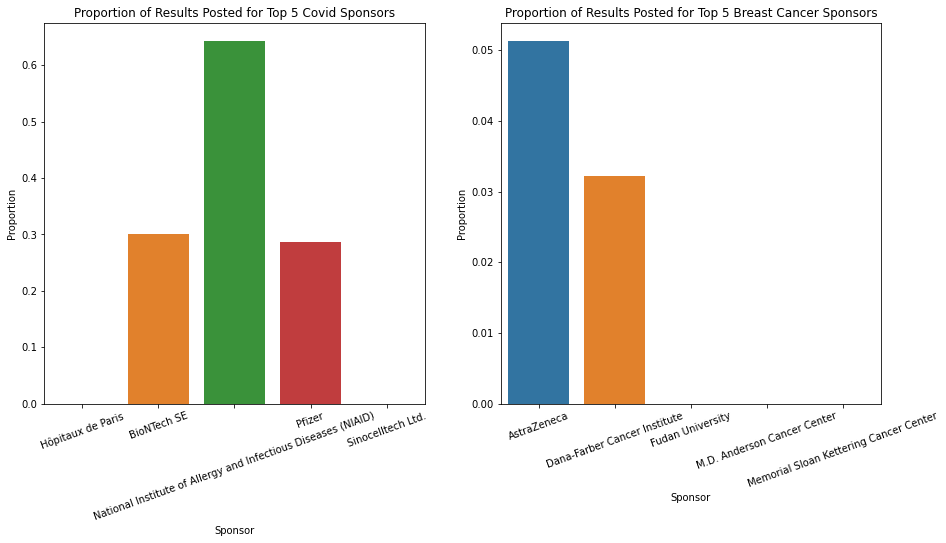

In [102]:
#Graph proportions of results posted for the top 5 sponsors for both covid and breast cancer
fig, ax = plt.subplots(1, 2, figsize=(15, 7), facecolor='white')
sns.barplot(data=covidTopSponsorsResults, x="Sponsor", y="Proportion", ax=ax[0])
ax[0].set_title("Proportion of Results Posted for Top 5 Covid Sponsors")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=20)
sns.barplot(data=breastTopSponsorsResults, x="Sponsor", y="Proportion", ax=ax[1])
ax[1].set_title("Proportion of Results Posted for Top 5 Breast Cancer Sponsors")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=20)
plt.show()

